Тема №23 "Употребление алкоголя учащимися" - Балашов КМБО-03-20

Устанавливаем необходимые библиотеки:

In [1]:
!pip install pandas
!pip install sklearn
!pip install statsmodels 

In [2]:
import pandas
import numpy
import math
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.cm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot 
import statsmodels.api 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime as dt
import csv

Считываем наборы данных:

In [3]:
data1 = pandas.read_csv('student-por.csv')
data2 = pandas.read_csv('student-mat.csv')
Data = [data1, data1]
Data = pandas.concat(Data)
Data = data1.append(data2, ignore_index=True)

In [4]:
Data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# 1. Построить прогноз итогового бала учащегося

Преобразуем текстовые данные в числовые:

In [5]:
arr = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for column in arr:
    Set = set(Data[column])
    i = 0
    for item in Set:
        Data[column] = Data[column].replace(item, i)
        i = i + 1
    

Нормируем признак для числовых признаков через стандартное отклонение:

In [6]:
Data['age'] = (Data['age'] - Data['age'].mean())/(math.sqrt(Data['age'].var()))
Data['absences'] = (Data['absences'] - Data['absences'].mean())/(math.sqrt(Data['absences'].var()))  
Data['G1'] = (Data['G1'] - Data['G1'].mean())/(math.sqrt(Data['G1'].var())) 
Data['G2'] = (Data['G2'] - Data['G2'].mean())/(math.sqrt(Data['G2'].var())) 
Data['G3'] = (Data['G3'] - Data['G3'].mean())/(math.sqrt(Data['G3'].var())) 

Выделим целевой признак(G3) и удалим его из Датасета:

In [7]:
Data2 = Data.G3
train = Data.drop('G3', axis = 1)

 Проверим на наличие линейной зависимости между переменными
 
 Если коэффициент VIF > 10, то существует линейная зависимость:

In [8]:
vif = pandas.DataFrame()
vif["column_name"] = train.columns
vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
vif.loc[vif['VIF'] > 10.0]

,column_name,VIF
6,Medu,12.209937
7,Fedu,10.736939
20,higher,13.366069
23,famrel,17.343770
24,freetime,12.121061
25,goout,11.939263


Будем избавляться от переменных с максимальным VIF, пока все VIF не окажутся меньше 10:

In [9]:
while not (vif.empty): 
    vif = pandas.DataFrame()
    vif["column_name"] = train.columns
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    vif = vif.loc[vif['VIF'] >= 10.0]
    a = vif[vif["VIF"] == vif["VIF"].max()]["column_name"]
    print(a.array[0])
    train = train.drop(a, axis=1)

famrel
higher
Medu
goout


IndexError: index 0 is out of bounds for axis 0 with size 0

In [10]:
train

,school,sex,age,address,famsize,Pstatus,Fedu,Mjob,Fjob,reason,...,nursery,internet,romantic,freetime,Dalc,Walc,health,absences,G1,G2
0,0,1,1.027397,0,0,1,4,4,3,1,...,1,0,0,3,1,1,3,-0.070027,-3.758673,-0.074936
1,0,1,0.220929,0,0,0,1,4,0,1,...,0,1,0,3,1,1,3,-0.392087,-0.741974,-0.074936
2,0,1,-1.392007,0,1,0,1,4,0,0,...,1,1,0,3,2,3,3,0.252034,0.263592,0.533879
3,0,1,-1.392007,0,0,0,2,2,1,3,...,1,1,1,2,1,1,5,-0.714147,0.933969,0.838287
4,0,1,-0.585539,0,0,0,3,0,0,3,...,1,0,0,3,1,2,5,-0.714147,-0.071597,0.533879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,2.640333,0,1,1,2,1,1,1,...,1,0,0,5,4,5,4,1.057185,-0.741974,-0.683750
1040,1,0,0.220929,0,1,0,1,1,1,1,...,0,1,0,4,3,4,2,-0.231057,0.933969,1.447102
1041,1,0,3.446801,1,0,0,1,0,0,1,...,0,0,0,5,3,3,3,-0.231057,-0.406786,-0.988158
1042,1,0,1.027397,1,1,0,2,1,0,1,...,0,1,0,4,3,4,5,-0.714147,-0.071597,0.229472


Разделяем данные на обучающую и тестовую выборку:

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(train,Data2, test_size = 0.3, random_state = 42)
train.shape

(1044, 28)

In [12]:
X_train

,school,sex,age,address,famsize,Pstatus,Fedu,Mjob,Fjob,reason,...,nursery,internet,romantic,freetime,Dalc,Walc,health,absences,G1,G2
447,1,0,0.220929,1,0,0,1,0,0,0,...,1,0,1,5,5,5,3,0.574094,-1.077163,-0.379343
694,0,1,-1.392007,0,1,1,3,0,0,1,...,1,1,1,2,1,1,5,0.574094,-1.077163,-0.988158
448,1,1,-0.585539,1,0,0,4,3,3,1,...,1,1,1,2,1,1,4,0.252034,1.604347,1.447102
934,0,0,0.220929,0,0,0,1,0,0,2,...,0,1,0,3,1,2,4,-0.392087,0.263592,-0.379343
582,1,1,1.833865,0,1,1,1,4,0,1,...,1,0,0,4,1,1,5,-0.714147,-1.747540,-0.988158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,1,-1.392007,0,0,0,2,0,0,2,...,1,1,0,3,1,3,1,-0.070027,1.269158,1.142694
330,0,1,1.027397,0,0,0,1,0,0,2,...,1,1,1,3,1,1,5,0.896154,0.263592,0.533879
466,1,0,-1.392007,0,0,0,1,0,1,3,...,1,0,0,2,1,3,4,-0.714147,-0.406786,-0.683750
121,0,0,-1.392007,0,0,0,2,1,1,3,...,1,1,0,5,1,2,5,0.252034,0.933969,0.533879


В тренировочную выборку попадут 730 объектов

Построим модель линейной регрессии:

In [13]:
model = LinearRegression().fit(X_train,Y_train)
print (model.score(X_test,Y_test))

0.8354351069850131


R^2 = 0.8379346172905776

In [14]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.16987376643217875
slope: [ 0.02563716  0.01169818 -0.01950017 -0.01566681 -0.01634197  0.0074082
 -0.01024713  0.0065342  -0.00298944 -0.02094183 -0.05491112  0.04814894
 -0.01929104 -0.11166943  0.07740339  0.04593801 -0.07089452 -0.03005844
 -0.00711277 -0.00707154 -0.03755929 -0.00923924 -0.01344943  0.00997318
 -0.00732745  0.05021778  0.12701637  0.7973484 ]


In [15]:
print('G3 = ', model.intercept_,'+') 
for i in range(len(train.columns)-1):
    print(model.coef_[i],'*',train.columns[i],'+')
print(model.coef_[len(train.columns)-1],'*',train.columns[len(train.columns)-1])    

G3 =  0.16987376643217875 +
0.02563716033429331 * school +
0.01169817521405268 * sex +
-0.019500166793284434 * age +
-0.015666814055066567 * address +
-0.016341973485239178 * famsize +
0.007408199119350586 * Pstatus +
-0.010247132598149907 * Fedu +
0.006534203835179059 * Mjob +
-0.002989437286947814 * Fjob +
-0.020941826441747944 * reason +
-0.0549111209231241 * guardian +
0.04814894291335772 * traveltime +
-0.019291040061392817 * studytime +
-0.11166943202709809 * failures +
0.0774033856006938 * schoolsup +
0.045938010732101374 * famsup +
-0.07089451684886684 * paid +
-0.03005844014350527 * activities +
-0.00711277454691548 * nursery +
-0.007071539538965607 * internet +
-0.03755928669946984 * romantic +
-0.009239242193155701 * freetime +
-0.01344942615766682 * Dalc +
0.00997318440366965 * Walc +
-0.007327450384538271 * health +
0.050217781870780465 * absences +
0.12701636592953505 * G1 +
0.7973484032613066 * G2


# 2. Насколько сильно влияет употребление алкоголя

Чтобы выявить, насколько сильно употребление алкоголя влияет на итоговый бал учащегося, построим линейную регрессию G3(итоговый бал) на параметры Dalc(употребление алкоголя в будний день) и Walc(употребление алкоголя в выходные дни)

In [16]:
Alc_Data = Data.loc[:, Data.columns.isin(['Dalc','Walc'])]
data  = Data.loc[:, Data.columns.isin(['G3'])]

In [17]:
model_Alc =  LinearRegression().fit(Alc_Data,Data2)
print(model_Alc.score(Alc_Data, Data2))

0.018754503525254318


R^2 = 0.018754503525254318

In [18]:
print('intercept:', model_Alc.intercept_)
print('slope:', model_Alc.coef_)

intercept: 0.25492506596432607
slope: [-0.1031551  -0.04411732]


In [19]:
print('G3 = ', model_Alc.intercept_,'+') 
for i in range(len(Alc_Data.columns)-1):
    print(model_Alc.coef_[i],'*',Alc_Data.columns[i],'+')
print(model_Alc.coef_[len(Alc_Data.columns)-1],'*',Alc_Data.columns[len(Alc_Data.columns)-1]) 

G3 =  0.25492506596432607 +
-0.10315510322966899 * Dalc +
-0.044117319844223485 * Walc


Как видно из данной модели, употребление алкоголя негативно сказывается на итоговом бале учащегося, причем употребление алкоголя в будние дни сильнее влияет на итоговую оценку, чем употребление в алкоголя в выходные дни

# 3. Какие параметры вносят наибольший вклад в предсказание

Хоть потребление алкоголя и негативно сказывается на итоговом бале учащегося, но коэффициенты перед параметрами Dalc(употребление алкоголя в будний день) и Walc(употребление алкоголя в выходные дни) довольно маленькие. Таким образом, эти параметры не вносят наибольший вклад в предсказание результата итоговой оценки.

Вычислим среднее, максимальное и минимальное значение среди коэффициентов модели:

In [20]:
middle = model.coef_.mean()
print("Среднее значение = ",middle)
max = model.coef_.max()
print("Максимальное значение = ",max)
min = model.coef_.min()
print("Минимальное значение = ",min)



Среднее значение =  0.026894721179613775
Максимальное значение =  0.7973484032613066
Минимальное значение =  -0.11166943202709809


Найдем параметры вносят наибольший вклад в предсказание:

In [21]:
vail = model.coef_[0].mean()
for i in range(len(train.columns)):
    if abs(model.coef_[i].max()) > vail:
        print(train.columns[i],"=",model.coef_[i].max())
        


guardian = -0.0549111209231241
traveltime = 0.04814894291335772
failures = -0.11166943202709809
schoolsup = 0.0774033856006938
famsup = 0.045938010732101374
paid = -0.07089451684886684
activities = -0.03005844014350527
romantic = -0.03755928669946984
absences = 0.050217781870780465
G1 = 0.12701636592953505
G2 = 0.7973484032613066


Найдем параметры, который вносят далеко не основной вклад в предсказание результата итоговой оценки.:

In [22]:
vail = model.coef_[0].max()
for i in range(len(train.columns)):
    if abs(model.coef_[i].max()) < vail:
        print(train.columns[i],"=",model.coef_[i].max())
        

sex = 0.01169817521405268
age = -0.019500166793284434
address = -0.015666814055066567
famsize = -0.016341973485239178
Pstatus = 0.007408199119350586
Fedu = -0.010247132598149907
Mjob = 0.006534203835179059
Fjob = -0.002989437286947814
reason = -0.020941826441747944
studytime = -0.019291040061392817
nursery = -0.00711277454691548
internet = -0.007071539538965607
freetime = -0.009239242193155701
Dalc = -0.01344942615766682
Walc = 0.00997318440366965
health = -0.007327450384538271


# 4. Построить графики статистической оценки параметров

Выведем статистику модели в виде таблицы:

In [23]:
ols = statsmodels.api.OLS(data, train)
res = ols.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.840
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              190.1
Date:                Fri, 04 Jun 2021   Prob (F-statistic):                        0.00
Time:                        23:51:26   Log-Likelihood:                         -525.21
No. Observations:                1044   AIC:                                      1106.
Df Residuals:                    1016   BIC:                                      1245.
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Построим диаграммы:

<ipython-input-29-1b91853e13f1>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = matplotlib.pyplot.axes()
No handles with labels found to put in legend.


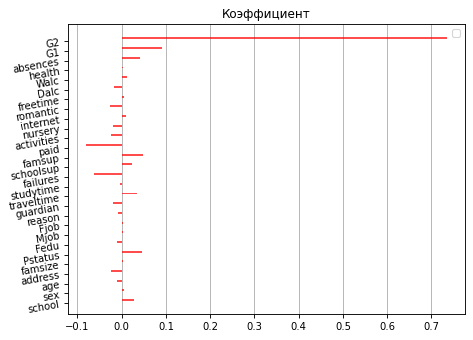

In [29]:
dpi = 80
fig = matplotlib.pyplot.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
matplotlib.pyplot.rcParams.update({'font.size': 9})

matplotlib.pyplot.title('Коэффициент')

ax = matplotlib.pyplot.axes()
ax.xaxis.grid(True, zorder = 1)

xs = range(len(train.columns))

matplotlib.pyplot.barh([x + 0.3 for x in xs], [ d * 0.9 for d in  res.params],
         height = 0.2, color = 'red', alpha = 0.7,
         zorder = 2)

matplotlib.pyplot.yticks(xs, train.columns, rotation = 10)

matplotlib.pyplot.legend(loc='upper right')
fig.savefig('barshoris.png')

<ipython-input-30-e1f0e66c5710>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = matplotlib.pyplot.axes()
No handles with labels found to put in legend.


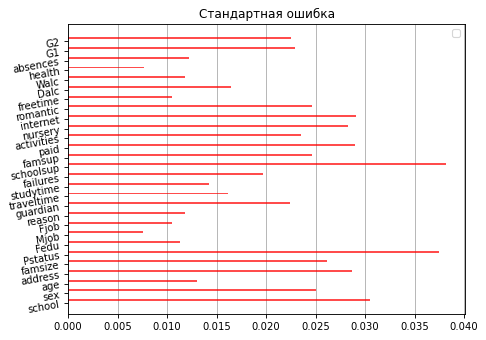

In [30]:
dpi = 80
fig = matplotlib.pyplot.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
matplotlib.pyplot.rcParams.update({'font.size': 9})

matplotlib.pyplot.title('Стандартная ошибка')

ax = matplotlib.pyplot.axes()
ax.xaxis.grid(True, zorder = 1)

xs = range(len(train.columns))

matplotlib.pyplot.barh([x + 0.3 for x in xs], [ d * 0.9 for d in  res.bse],
         height = 0.2, color = 'red', alpha = 0.7,
         zorder = 2)

matplotlib.pyplot.yticks(xs, train.columns, rotation = 10)

matplotlib.pyplot.legend(loc='upper right')
fig.savefig('barshoris.png')

<ipython-input-32-0699bb6325e8>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = matplotlib.pyplot.axes()
No handles with labels found to put in legend.


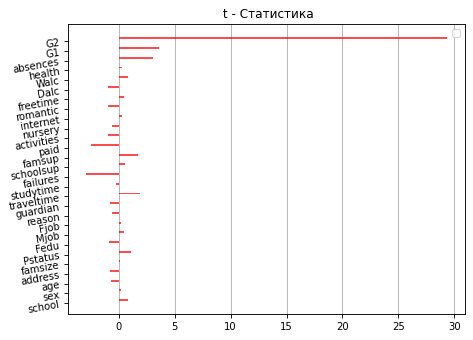

In [32]:
dpi = 80
fig = matplotlib.pyplot.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
matplotlib.pyplot.rcParams.update({'font.size': 9})

matplotlib.pyplot.title(' t - Статистика')

ax = matplotlib.pyplot.axes()
ax.xaxis.grid(True, zorder = 1)

xs = range(len(train.columns))

matplotlib.pyplot.barh([x + 0.3 for x in xs], [ d * 0.9 for d in  res.tvalues],
         height = 0.2, color = 'red', alpha = 0.7,
         zorder = 2)

matplotlib.pyplot.yticks(xs, train.columns, rotation = 10)

matplotlib.pyplot.legend(loc='upper right')
fig.savefig('barshoris.png')

<ipython-input-33-f9b84ef96143>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = matplotlib.pyplot.axes()
No handles with labels found to put in legend.


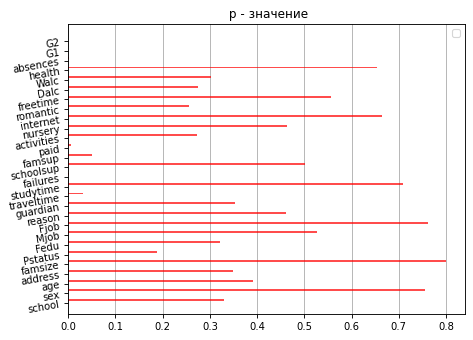

In [33]:
dpi = 80
fig = matplotlib.pyplot.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
matplotlib.pyplot.rcParams.update({'font.size': 9})

matplotlib.pyplot.title(' p - значение')

ax = matplotlib.pyplot.axes()
ax.xaxis.grid(True, zorder = 1)

xs = range(len(train.columns))

matplotlib.pyplot.barh([x + 0.3 for x in xs], [ d * 0.9 for d in  res.pvalues],
         height = 0.2, color = 'red', alpha = 0.7,
         zorder = 2)

matplotlib.pyplot.yticks(xs, train.columns, rotation = 10)

matplotlib.pyplot.legend(loc='upper right')
fig.savefig('barshoris.png')

# 5. Применить алгоритмы кластеризации

In [34]:
dbscan = DBSCAN(eps=3.14, min_samples=2.5)

dbscan.fit(X_train)
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)
print(set(dbscan.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, -1}


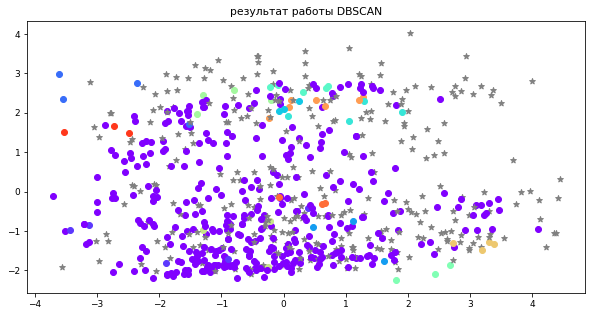

In [37]:
matplotlib.pyplot.figure(figsize=(10, 5))
colors = matplotlib.cm .rainbow(numpy.linspace(0, 1, len(set(dbscan.labels_))))
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == -1:
        c0 = matplotlib.pyplot.scatter(pca_2d[i, 0], pca_2d[i, 1], c = 'grey', marker='*')
    else:
        matplotlib.pyplot.scatter(pca_2d[i, 0], pca_2d[i, 1], c = [colors[dbscan.labels_[i]]], marker='o')
matplotlib.pyplot.title('результат работы DBSCAN')
matplotlib.pyplot.show()

Как видно из графика, у данной модели нет явных кластеров

# 6. Что общего между объектами в каждом кластере

Ответ: Нельзя найти общие признаки у кластеров, так как кластеров нет